# Week 3 Assignment

Name: Kesav Adithya Venkidusamy<br>
Course: DSC630 - Predictive Analytics<br>
Instructor: Fadi Alsaleem<br>

In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.

You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all your code and to document your steps, process, and analysis.

##### 1. Importing all the libraries required for this exercise

In [2]:
## Importing libraries required for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

##### 2. Load the Dataset into dataframe

In [5]:
## Load the House data into a dataframe
bb_df = pd.read_csv('dodgers-2022.csv') 
bb_df.head(5)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [6]:
## Printing number of rows and columns
bb_df.shape

(81, 12)

In [7]:
## Printing the dtype for each of the column
bb_df.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

In [8]:
## Looking at summary information about your data (total, mean, min, max, freq, unique, etc.)
bb_df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


##### Visualizations

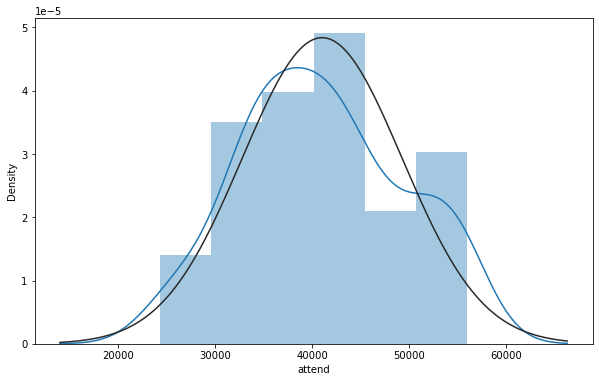

<Figure size 432x288 with 0 Axes>

In [9]:
### Histogram and normal probability plot
plt.figure(figsize=(10,6))
sns.distplot(bb_df['attend'], fit=norm);
fig = plt.figure()


In [10]:
## Printing skewness and kurtosis
print("Skewness: %f" % bb_df['attend'].skew())
print("Kurtosis: %f" % bb_df['attend'].kurt())

Skewness: 0.137615
Kurtosis: -0.753389


##### Observation

<b>Skewness:</b>
1. Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness.
2. The value of skewness is 0.13716 which lies between -0.5 and 0.5 for the above plot. So, the distribution is approximately symmetric.

<b>Kurtosis</b>
1. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
2. The value for Kurtosus is -0.753389 and is less than 3. So, the dataset has lighter tails than a normal distribution (less in the tails)

##### Correlation

###### Numerical Variables

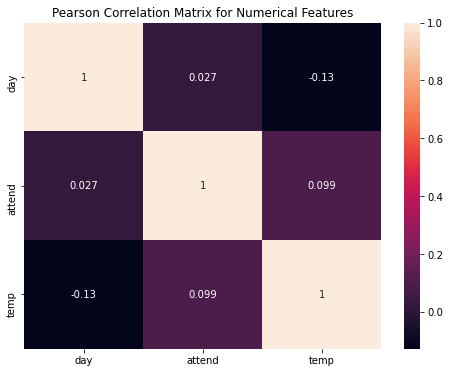

In [11]:
# To find the correlations between the variables/features, a correlation matrix of the df is used
# A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data.
correlation_mat = bb_df.corr()

# Plotting heatmap using the correlation_mat created in the previous step
plt.figure(figsize=(8,6))
sns.heatmap(correlation_mat, annot = True)
plt.title('Pearson Correlation Matrix for Numerical Features', fontsize=12)
plt.show()

##### Observation

1. The above correlation matrix only shows the relationship between numerical or non-categorical variables present in the data set
2. Based on the above result, we see the attendance is postively correlated to the variable temperature. So, the increase in temperature results in increase in head count. This makes sense as people is interest to go out to see the match when temperature is good.
3. The day of the month is also positively correlated to the temperature. The people is somewhat less interested to go to the match during initial days of the month. However, they are interested to go during mid and end of the months. 

###### Categorical Variables

In [12]:
## Option to display all the columns present in the dataframe
pd.set_option('display.max_columns', None)

In [13]:
# To support the Spearman Correlation Matrix, create dummy variables for the object type columns to get all the drop-down options into their own columns
catCols = ['month', 'day_of_week', 'opponent','skies','day_night', 'cap', 'shirt', 'fireworks', 'bobblehead']
bb_cat_df = pd.get_dummies(bb_df, columns=catCols)
bb_cat_df.head(5)

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,opponent_Angels,opponent_Astros,opponent_Braves,opponent_Brewers,opponent_Cardinals,opponent_Cubs,opponent_Giants,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,10,56000,67,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0
1,11,29729,58,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
2,12,28328,57,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,13,31601,54,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,14,46549,57,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0


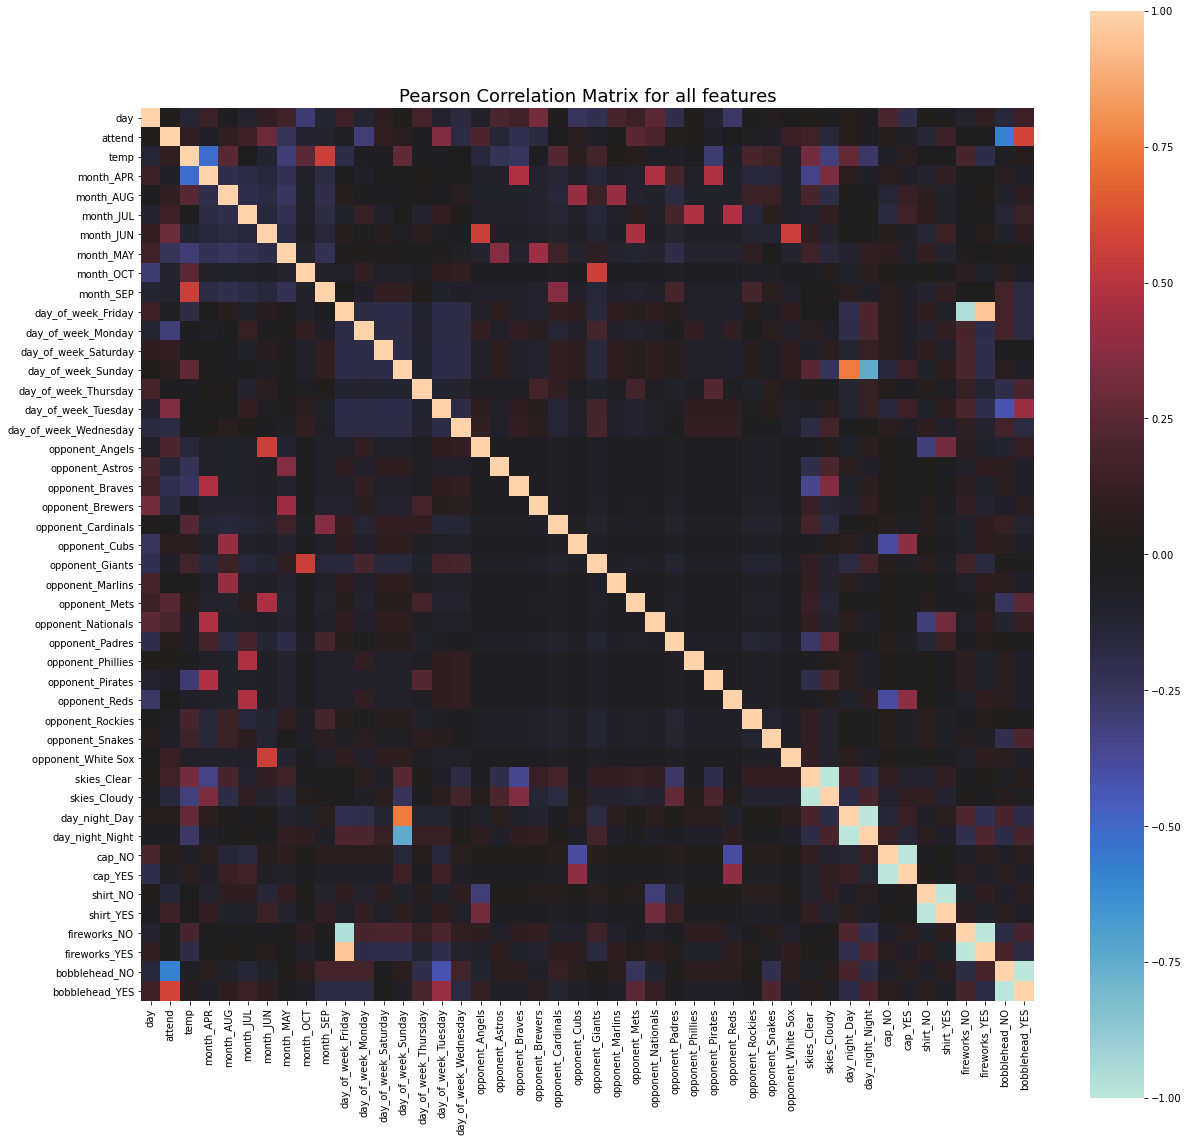

In [14]:
## Plotting heat map matrix for the correlation
## look for multicollinearity of features
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(bb_cat_df.corr(), center=0,  
           vmin=-1, vmax=1,  square=True)
# title
plt.title('Pearson Correlation Matrix for all features', fontsize=18)
plt.show()

In [15]:
# Create a Spearman Correlation Matrix: Relationship between the categorical and non-categorical variables
bb_cat_df.corr('spearman').style.background_gradient(cmap="Blues")

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,opponent_Angels,opponent_Astros,opponent_Braves,opponent_Brewers,opponent_Cardinals,opponent_Cubs,opponent_Giants,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
day,1.000000,0.063626,-0.123692,0.104875,-0.028569,-0.079586,0.108461,0.153172,-0.293820,-0.113057,0.134612,-0.119007,0.083503,0.035273,0.172376,-0.090701,-0.165867,-0.106335,0.179090,0.141313,0.319518,0.038556,-0.237854,-0.216080,0.159502,0.130490,0.225262,-0.188335,0.053167,-0.131519,-0.264438,-0.021860,0.052969,0.029382,0.054252,-0.054252,0.052377,-0.052377,0.194109,-0.194109,0.037777,-0.037777,-0.091546,0.091546,-0.141919,0.141919
attend,0.063626,1.000000,0.090628,-0.055739,0.101270,0.096614,0.314192,-0.223536,-0.109043,-0.109991,-0.030209,-0.325514,0.128028,0.051787,-0.008776,0.333736,-0.167959,0.204106,-0.156575,-0.167758,-0.134038,0.015034,0.109043,-0.086529,0.002796,0.248580,0.204106,0.038644,-0.011184,-0.082481,-0.030756,-0.082328,-0.089049,0.139799,0.144553,-0.144553,0.031944,-0.031944,0.051039,-0.051039,-0.139799,0.139799,-0.015361,0.015361,-0.544860,0.544860
temp,-0.123692,0.090628,1.000000,-0.495820,0.296848,0.012656,-0.132964,-0.337159,0.268880,0.527833,-0.167878,-0.024568,-0.044672,0.237768,0.014286,-0.020895,0.010423,-0.184855,-0.226868,-0.278683,-0.059812,0.181659,0.082625,0.196922,0.032210,0.076901,-0.079824,-0.010099,-0.025208,-0.273081,-0.092428,0.161577,0.167468,-0.102230,0.259024,-0.259024,0.249189,-0.249189,-0.066466,0.066466,-0.011203,0.011203,0.178363,-0.178363,-0.074884,0.074884
month_APR,0.104875,-0.055739,-0.495820,1.000000,-0.198811,-0.173913,-0.147442,-0.222911,-0.081786,-0.173913,0.007013,-0.076087,0.007013,0.007013,0.037438,0.007013,0.021739,-0.081786,-0.081786,0.470270,-0.095050,-0.128262,-0.081786,-0.147442,-0.081786,-0.095050,0.470270,0.184302,-0.081786,0.470270,-0.081786,-0.147442,-0.147442,-0.081786,-0.343251,0.343251,0.069584,-0.069584,0.066354,-0.066354,-0.102233,0.102233,0.006808,-0.006808,0.063872,-0.063872
month_AUG,-0.028569,0.101270,0.296848,-0.198811,1.000000,-0.198811,-0.168550,-0.254824,-0.093495,-0.198811,0.051309,-0.019881,-0.035275,-0.035275,0.009782,-0.035275,0.069584,-0.093495,-0.093495,-0.093495,-0.108657,-0.146625,0.411377,0.134840,0.411377,-0.108657,-0.093495,-0.168550,-0.093495,-0.093495,-0.093495,0.134840,0.134840,-0.093495,0.188903,-0.188903,0.018182,-0.018182,-0.128951,0.128951,0.093495,-0.093495,-0.034245,0.034245,-0.089337,0.089337
month_JUL,-0.079586,0.096614,0.012656,-0.173913,-0.198811,1.000000,-0.147442,-0.222911,-0.081786,-0.173913,-0.087664,0.119565,-0.087664,0.007013,-0.106966,0.101690,0.021739,-0.081786,-0.081786,-0.081786,-0.095050,-0.128262,-0.081786,-0.147442,-0.081786,0.065347,-0.081786,0.184302,0.470270,-0.081786,0.470270,-0.147442,0.073721,-0.081786,-0.097204,0.097204,-0.019881,0.019881,-0.157591,0.157591,0.081786,-0.081786,0.006808,-0.006808,-0.139015,0.139015
month_JUN,0.108461,0.314192,-0.132964,-0.147442,-0.168550,-0.147442,1.000000,-0.188982,-0.069338,-0.147442,0.059456,-0.036860,0.059456,-0.047565,0.072548,-0.047565,-0.036860,0.554700,-0.069338,-0.069338,-0.080582,-0.108740,-0.069338,-0.125000,-0.069338,0.463348,-0.069338,-0.125000,-0.069338,-0.069338,-0.069338,-0.125000,-0.125000,0.554700,0.103011,-0.103011,0.033710,-0.033710,0.056254,-0.056254,-0.138675,0.138675,-0.046176,0.046176,-0.089188,0.089188
month_MAY,0.153172,-0.223536,-0.337159,-0.222911,-0.254824,-0.222911,-0.188982,1.000000,-0.104828,-0.222911,0.008989,0.027864,0.008989,0.008989,-0.013710,0.008989,-0.055728,-0.104828,0.366900,-0.104828,0.4264

In [16]:
## Check out all the variables correlationg with attend
## Pearson correlation is used
df_correlations = bb_cat_df.corr().stack().reset_index().sort_values(0, ascending=False)
df_correlations.loc[df_correlations['level_0'] == 'attend'].sort_values(0, ascending=False)

,level_0,level_1,0
47,attend,attend,1.000000
91,attend,bobblehead_YES,0.581895
61,attend,day_of_week_Tuesday,0.355316
52,attend,month_JUN,0.295853
71,attend,opponent_Mets,0.236213
63,attend,opponent_Angels,0.207796
72,attend,opponent_Nationals,0.195667
80,attend,skies_Clear,0.150963
51,attend,month_JUL,0.143837
87,attend,shirt_YES,0.133269


In [17]:
## Repeating the above step for spearman correlation
df_correlations = bb_cat_df.corr('spearman').stack().reset_index().sort_values(0, ascending=False)
df_correlations.loc[df_correlations['level_0'] == 'attend'].sort_values(0, ascending=False)

,level_0,level_1,0
47,attend,attend,1.000000
91,attend,bobblehead_YES,0.544860
61,attend,day_of_week_Tuesday,0.333736
52,attend,month_JUN,0.314192
71,attend,opponent_Mets,0.248580
72,attend,opponent_Nationals,0.204106
63,attend,opponent_Angels,0.204106
80,attend,skies_Clear,0.144553
79,attend,opponent_White Sox,0.139799
87,attend,shirt_YES,0.139799


###### Difference between Pearson and Spearman Correlation

Pearson correlation evaluates the linear relationship between two continuous variables. Spearman correlation: Spearman correlation evaluates the monotonic relationship. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

##### Observation

1. A positive correlation is a relationship between two variables that move in the same direction where as Negative correlation describes when two variables tend to move in opposite size and direction from one another
2. Based on Pearson and Spearman correlation results above, we see Attendance is highly postively correlated to: the months of June, July & August, Tuesday & Saturday games, games against the Angels, Cubs, Mets, Nationals & White Sox, games on clear sky days, and game days when free shirts and bobblehead are given out.
3. We also see Attedance is highly negatively correlated to: the months of April, May, September & October, Wednesday & Monday games, games against the Astros, Braves, Bruins, Pirates, Rockies & Snakes, games on cloudy days, and game days when no free shirts and no bobblehead are given out.

#### Linear Regression

In [43]:
#Setting the value for X and Y
df = bb_cat_df.copy()

y = df['attend']
x = df.drop('attend',1)

In [45]:
## Showing the values for x
x.head()

,day,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,opponent_Angels,opponent_Astros,opponent_Braves,opponent_Brewers,opponent_Cardinals,opponent_Cubs,opponent_Giants,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,10,67,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0
1,11,58,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
2,12,57,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,13,54,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,14,57,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0


In [46]:
## Showing the value for y
y.head()

0    56000
1    29729
2    28328
3    31601
4    46549
Name: attend, dtype: int64

In [47]:
## Splitting the dataframe for  train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [48]:
## Multiple Linear Regression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [49]:
#Intercept and Coefficient

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  48020.11016548949
Coefficients:


[('day', 434.35500034172725),
 ('temp', -53.28702163131573),
 ('month_APR', -5162.524705009923),
 ('month_AUG', 3252.9679797869258),
 ('month_JUL', -3729.480132314525),
 ('month_JUN', 1766.7257588288967),
 ('month_MAY', -3893.9432535064734),
 ('month_OCT', 8168.6910535974175),
 ('month_SEP', -402.4367013821127),
 ('day_of_week_Friday', -13352.694193805713),
 ('day_of_week_Monday', -3978.0441943458077),
 ('day_of_week_Saturday', 5313.480535971895),
 ('day_of_week_Sunday', -554.366898942626),
 ('day_of_week_Thursday', 2490.2665931914357),
 ('day_of_week_Tuesday', 10399.836747377092),
 ('day_of_week_Wednesday', -318.4785894464325),
 ('opponent_Angels', 4135.503696219863),
 ('opponent_Astros', -3366.40592605868),
 ('opponent_Braves', -2421.77296295778),
 ('opponent_Brewers', -6672.283749237914),
 ('opponent_Cardinals', -2123.060283675282),
 ('opponent_Cubs', 7205.26440922086),
 ('opponent_Giants', -4713.739008370042),
 ('opponent_Marlins', -10059.067173755366),
 ('opponent_Mets', -2415.750

In [50]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [61112.14490535 50688.62495422 44441.81566532 49289.03661167
 42609.46252332 35508.12736722 36392.42139352 34985.92659206
 31947.84512894 45389.80584226 62754.08093432 50082.63692479
 37093.74548468 30701.01392035 32388.56614008 38632.25077381
 25695.74880189 45075.814302   57797.75681378 23857.82578383
 30606.84261022 34062.68411605 47054.54832527 35442.43761246
 37055.79617209]


In [52]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
11,48753,61112.144905
77,35607,50688.624954
25,33306,44441.815665
5,38359,49289.036612
62,40284,42609.462523


In [53]:
## EValuating the model

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 32.04
Mean Absolute Error: 9637.865409141375
Mean Square Error: 128425071.68335885
Root Mean Square Error: 11332.478620467758


##### Observation

1. R Square is the coefficient of determination. The value of R Square is 32.04, which indicates that 32.04% of the data fit the regression model.
2.  Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. The mean Absolute Error is 9637.865 which is pretty bad as 0 indicates good value.
3. Mean Square Error is calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance. The mean square error obtained for this particular model is 128425071.636, which is pretty bad.
4. Root Mean Square Error is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance. The root mean square error obtained for this particular model is 11332.47, which is pretty good.

<b> Bascially, I ran the model on the raw data without removing outliers or performing any transformations. That may be the reason for the poor scores. Another reason for the poor score is due to volume of the data which is very less. I also noticed that coefficients are positive for the features those are positively correlated with Attendance and negative for negatively correlated with Attendance. </b>

### Recommendations

<b>To increase attendance at LA Dodgers games, Dodgers management should specifically take the following recommendations into consideration:</b>
    
1. Games played in the summer months and on clear sky days tend to be positively correlated with attendance, however management does not have control over these seasonality & weather factors. So the only recommendation is to schedule more games (if possible) in the summer months and on weeks with historically clear sky days in Los Angeles. And, schedule less games in the spring or fall seasons and historically cloudy weeks in Los Angeles.
2. Similarly, Games scheduled on Tuesday and Saturday tend to be positively correlated with attendance, while Wednesday & Monday games tend tend to be negatively correlated with attendance. Therefore, if the Dodgers management could schedule more games on Tuesdays & Saturdays, this could potentially increase attendance in the season.
3. Games played against the Angels, Cubs, Mets, Nationals & White Sox tend to be postively correlated with attendance. If it is possible to schedule more games against these teams (and less with Astros, Braves, Bruins, Pirates, Rockies & Snakes), that would have a greater chance of increasing Dodgers games attendance in the MLB season. 
4. And finally, games where free t-shirts and bobbleheads are given out tend to be postively correlated with attendance, while games where no free t-shirts and bobbleheads are negatively correlated. Dodgers management should plan to give out more free t-shirts and Bobble heads if they want an increase the attendance for the season.